In [1]:
import sys
sys.path.insert(0, '/home/xp/stereo_toolbox/')
# auto reload modules
%load_ext autoreload
%autoreload 2

from stereo_toolbox.datasets_v2 import *
from stereo_toolbox.visualization import *

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
torch.backends.cudnn.benchmark = True
import matplotlib.pyplot as plt
import cv2

/home/xp/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def show_figures(left, right, colored_disp=None, noc_mask=None, raw_left=None, raw_right=None):
    if colored_disp is None:
        colored_disp = np.zeros((left.shape[1], left.shape[2], 3), dtype=np.uint8)
    if noc_mask is None:
        noc_mask = torch.zeros((left.shape[1], left.shape[2]))

    left, right = left.squeeze().cpu().numpy(), right.squeeze().cpu().numpy()
    noc_mask = noc_mask.squeeze().cpu().numpy()
    raw_left, raw_right = raw_left.squeeze().cpu().numpy(), raw_right.squeeze().cpu().numpy()

    left = (left - left.min()) / (left.max() - left.min())
    right = (right - right.min()) / (right.max() - right.min())

    plt.figure(figsize=(8, 3))
    plt.subplot(2, 3, 1)
    plt.title('Left Image')
    plt.imshow(left.transpose(1, 2, 0))
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.title('Right Image')
    plt.imshow(right.transpose(1, 2, 0))
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.title('Colored Disparity')
    plt.imshow(colored_disp)
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title('Raw Left Image')
    plt.imshow(raw_left.transpose(1, 2, 0))
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.title('Raw Right Image')
    plt.imshow(raw_right.transpose(1, 2, 0))
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.title('NOC Mask')
    plt.imshow((noc_mask * 255.0).astype(np.uint8), vmin=0, vmax=255, cmap='gray')
    plt.axis('off')

    plt.show()

In [ ]:
## KITTI 2015 dataloader test
from tqdm import tqdm

splits = ['train', 'test',]
batch_size = 1

for split in splits:
    for training in [True, False]:
        dataset = KITTI2015_Dataset(split=split, training=training,requests=['ref','tgt','gt_disp','noc_mask','raw_ref','raw_tgt', 'ref_filename'])
        dataloader = DataLoader(dataset, batch_size=batch_size)

        for i, data in tqdm(enumerate(dataloader)):
            print('split: ', split, ' training: ', training, ' samples: ', dataset.__len__(), ' left shape: ', data['ref'].shape)

            if 'gt_disp' in data:
                colored_disp = colored_disparity_map_KITTI(data['gt_disp'][0])
                colored_disp = cv2.cvtColor(colored_disp, cv2.COLOR_BGR2RGB)
            else:
                colored_disp = None
            
            if 'noc_mask' not in data:
                data['noc_mask'] = [None] * batch_size

            show_figures(data['ref'][0], data['tgt'][0], colored_disp, data['noc_mask'][0], data['raw_ref'][0], data['raw_tgt'][0])
            break

In [ ]:
## KITTI 2012 dataloader test
from tqdm import tqdm

splits = ['train', 'test',]
batch_size = 1

for split in splits:
    for training in [True, False]:
        dataset = KITTI2012_Dataset(split=split, training=training, requests=['ref','tgt','gt_disp','noc_mask','raw_ref','raw_tgt', 'ref_filename'])
        dataloader = DataLoader(dataset, batch_size=batch_size)

        for i, data in (enumerate(dataloader)):
            print('split: ', split, ' training: ', training, ' samples: ', dataset.__len__(), ' left shape: ', data['ref'].shape)

            if 'gt_disp' in data:
                colored_disp = colored_disparity_map_KITTI(data['gt_disp'][0])
                colored_disp = cv2.cvtColor(colored_disp, cv2.COLOR_BGR2RGB)
            else:
                colored_disp = None
            
            if 'noc_mask' not in data:
                data['noc_mask'] = [None] * batch_size

            show_figures(data['ref'][0], data['tgt'][0], colored_disp, data['noc_mask'][0], data['raw_ref'][0], data['raw_tgt'][0])
            break
            

In [ ]:
## SceneFlow dataloader test
from tqdm import tqdm

splits = ['train', 'test',]
batch_size = 1

for split in splits:
    for training in [True, False]:
        dataset = SceneFlow_Dataset(split=split, training=training,requests=['ref','tgt','gt_disp','noc_mask','raw_ref','raw_tgt', 'ref_filename'])
        dataloader = DataLoader(dataset, batch_size=batch_size)

        for i, data in (enumerate(dataloader)):
            print('split: ', split, ' training: ', training, ' samples: ', dataset.__len__(), ' left shape: ', data['ref'].shape, ' left filename: ', data['ref_filename'])

            if 'gt_disp' in data:
                colored_disp = colored_disparity_map_Spectral_r(data['gt_disp'][0])
                colored_disp = cv2.cvtColor(colored_disp, cv2.COLOR_BGR2RGB)
            else:
                colored_disp = None
            
            if 'noc_mask' not in data:
                data['noc_mask'] = [None] * batch_size

            show_figures(data['ref'][0], data['tgt'][0], colored_disp, data['noc_mask'][0], data['raw_ref'][0], data['raw_tgt'][0])
            if i > 40:
                assert 0
            # break

split:  train  training:  True  samples:  17644  left shape:  torch.Size([1, 3, 288, 576])  left filename:  ['/data1/xp/Carla/data6/Town01_Opt/ClearNight/00037402/rgb_0.png']


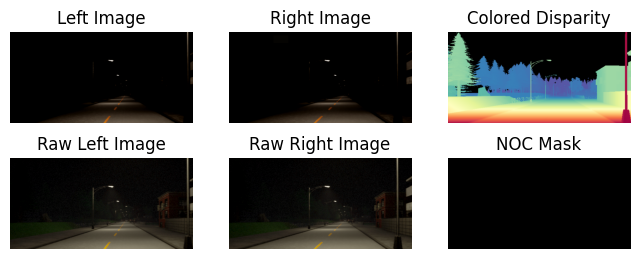

split:  train  training:  False  samples:  17644  left shape:  torch.Size([1, 3, 544, 960])  left filename:  ['/data1/xp/Carla/data6/Town01_Opt/ClearNight/00037402/rgb_0.png']


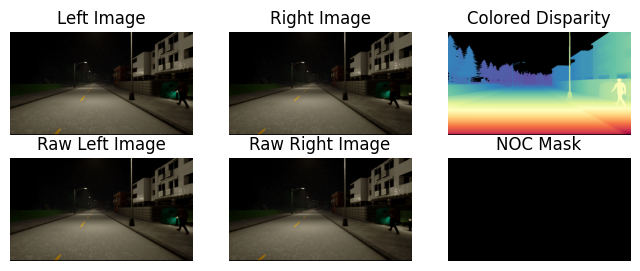

split:  test  training:  True  samples:  2773  left shape:  torch.Size([1, 3, 288, 576])  left filename:  ['/data1/xp/Carla/data6/Town10HD_Opt/ClearNight/00015706/rgb_0.png']


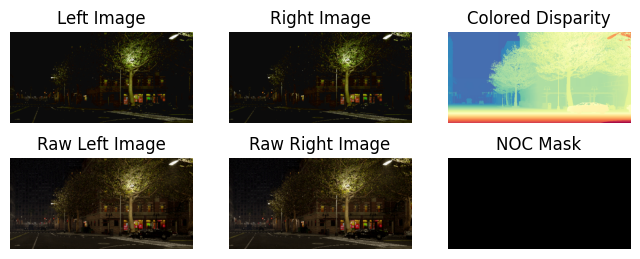

split:  test  training:  False  samples:  2773  left shape:  torch.Size([1, 3, 544, 960])  left filename:  ['/data1/xp/Carla/data6/Town10HD_Opt/ClearNight/00015706/rgb_0.png']


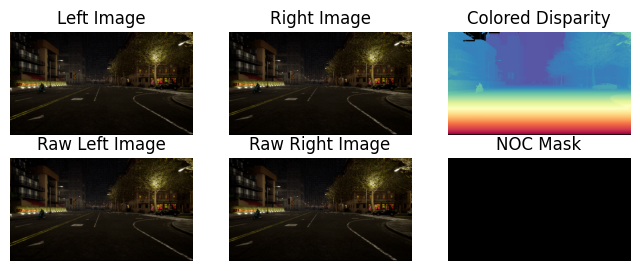

In [4]:
## RoVB dataloader test
from tqdm import tqdm
import sys
sys.path.insert(0, '/home/xp/RoVB/')

from dataset import RoVB_Dataset

splits = ['train', 'test']
batch_size = 1

for split in splits:
    for training in [True, False]:
        dataset = RoVB_Dataset(split=split, training=training,requests=['ref','tgt','gt_disp', 'raw_ref','raw_tgt', 'ref_filename'])
        dataloader = DataLoader(dataset, batch_size=batch_size)

        for i, data in (enumerate(dataloader)):
            print('split: ', split, ' training: ', training, ' samples: ', dataset.__len__(), ' left shape: ', data['ref'].shape, ' left filename: ', data['ref_filename'])

            if 'gt_disp' in data:
                colored_disp = colored_disparity_map_Spectral_r(data['gt_disp'][0])
                colored_disp = cv2.cvtColor(colored_disp, cv2.COLOR_BGR2RGB)
            else:
                colored_disp = None
            
            if 'noc_mask' not in data:
                data['noc_mask'] = [None] * batch_size

            show_figures(data['ref'][0], data['tgt'][0], colored_disp, data['noc_mask'][0], data['raw_ref'][0], data['raw_tgt'][0])
            break